# Make figures for multiple model runs

This is a notebook to generate a figure with side by side panels of surface elevation and watertable for several model runs, and a second figure with panels for the different water and erosion fluxes in these model runs.

See the notebook [summary_figures.ipynb](summary_figures.ipynb) for making summary figures of drainage density and incision for multiple model runs.

In [30]:
import pickle
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

import lib.figure_lib as flib

pl.rcParams['mathtext.default'] = 'regular'

## Parameters

In [31]:
# filename of pickle file
#fn = 'model_results/model_results_3_runs_100000yrs_Ts_id_90_25-3-2021.pck'
#fn = 'model_results/model_results_3_runs_100000yrs_Ts_id_882_25-3-2021.pck'
#fn = 'model_results/model_results_34_runs_100000yrs_sensitivity_all_id_311_1-4-2021.pck'
#fn = 'model_results/model_results_71_runs_10000yrs_sensitivity_all_id_208_26-7-2021.pck'

fn = 'model_results/model_results_71_runs_50000yrs_persistence_id_484_28-7-2021.pck'

## Model runs to display

In [32]:
year = 365.25 * 24 * 3600.

#display_param = 'T'
#param_label = 'T'
#display_param_values = [1e-3, 1e-2, 1e-1]
#param_unit = 'm^2\;s^{-1}'
#param_multiplier = 1.0
#log_transform_par = True

#display_param = 'K_d'
#param_label = 'K_d'
#param_unit = 'a^{-1}'
#param_multiplier = year
#display_param_values = [4e-5 / year, 4e-2 / year]
#log_transform_par = True

#display_param = 'S_init'
#param_label = 'S_0'
#param_unit = 'm\;m^{-1}'
#param_multiplier = 1.0
#display_param_values = [1e-4, 1e-2]
#log_transform_par = True

#display_param = 'n'
#param_label = 'n'
#param_unit = ''
#param_multiplier = 1.0
#display_param_values = [1.0, 2.6]
#log_transform_par = False

#display_param = 'specific_yield'
#param_label = 'S_y'
#param_unit = ''
#param_multiplier = 1.0
#display_param_values = [0.15, 0.5]
#log_transform_par = False

display_param = 'S_init'
param_label = 'S_0'
param_unit = 'm\;m^{-1}'
param_multiplier = 1.0
display_param_values = [1e-4, 1e-3]
log_transform_par = True


#display_param = 'P'
#param_label = 'P'
#param_unit = 'm\;a^{-1}'
#param_multiplier = year
#display_param_values = [0.25 / year, 0.75 / year, 1.5 / year]
#log_transform_par = False


## Load model results

In [33]:
fin = open(fn, 'rb')
output_data = pickle.load(fin)
fin.close()

## Get parameters model results

In [34]:
(df, times_all, x, zs_all, hs_all, 
 n_str_all, Q_baseflows_all, Q_overland_flows_all, 
 erosion_of_per_yr_all, erosion_bf_per_yr_all,
 erosion_hd_per_yr_all) = output_data

In [35]:
df.head()

,model_run,model_error,timestep,runtime_yr,computational_time,ET,K_d,K_n,P,S,...,width,year,time_yr,n_streams,stream_density_str_per_km,erosion_rate_m_per_yr,incision_rate_m_per_yr,avg_watertable_depth_m,ratio_overland_flow_baseflow,ratio_overland_and_baseflow_erosion
0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,0.0,0.0004,...,20000,31557600.0,50047.680148,12.0,0.6,1.640565e-06,0.000019,3.791941,0.002137,2.531112e-06
1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,0.0,0.0004,...,20000,31557600.0,50047.680148,12.0,0.6,1.126888e-07,0.000029,4.443719,0.000531,8.108825e-08
2,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,0.0,0.0004,...,20000,31557600.0,50047.680148,12.0,0.6,1.019787e-06,0.000022,3.968646,0.001514,1.139029e-06
3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,0.0,0.0004,...,20000,31557600.0,50047.680148,12.0,0.6,1.535716e-06,0.000020,3.818961,0.002030,2.248246e-06
4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25.0,0.0,0.0004,...,20000,31557600.0,50047.680148,12.0,0.6,1.933762e-06,0.000018,3.721504,0.002443,3.440527e-06


## Figure out which parameters changed in all runs

In [36]:
cols = df.columns.tolist()
cols = [c for c in cols if 'Unnamed' not in c]

input_cols = cols[:cols.index('n_streams')]

nus = np.array([len(df[col].unique()) for col in input_cols])

changed_param_ind = np.where(nus > 1)[0]
changed_params = [input_cols[ci] for ci in changed_param_ind] 

#changed_params.append(changed_param)
   
print('changed parameters in model sensitivity runs:')
print(changed_params)

changed parameters in model sensitivity runs:
['K_d', 'P', 'S_init', 'T', 'U', 'k_f', 'specific_yield']


In [37]:
df['S_init'].unique()

array([0.0004, 0.0001, 0.0012000000000000001, 0.0023, 0.0034,
       0.0045000000000000005, 0.005600000000000001, 0.0067,
       0.0078000000000000005, 0.0089, 0.01], dtype=object)

##

## Select model runs to show

In [54]:
df[display_param] = pd.to_numeric(df[display_param])

#n_exps = len(times_all)

#plot_inds = np.round(np.linspace(0, n_exps-1, 3)).astype(int)

#print('showing model experiment numbers ', plot_inds)

plot_inds = []

for v in display_param_values:
    
    #ind = df[display_param] == v
    #plot_inds.append(df.loc[ind].index[0])
    df['diff'] = np.abs(df[display_param] - v)
    ind = df['diff'].idxmin()
    plot_inds.append(ind)
    
changed_params = [display_param]

#param_labels = [param_label]
#param_units = [param_unit]
#param_multipliers = [param_multiplier]


## Make a figure of surface elevation and watertable of three model experiments

[-3.36316071 -3.16276665 -2.96237259 -2.76197854 -2.56158448 -2.36119042
 -2.16079637 -1.96040231 -1.76000825 -1.5596142 ]
[ -3.38472145  -4.35286161  -5.32100177  -6.28914192  -7.25728208
  -8.22542224  -9.19356239 -10.16170255 -11.12984271 -12.09798287]
saving model exps as model_results/modelled_h_and_z_2_model_exps_S_init.pdf


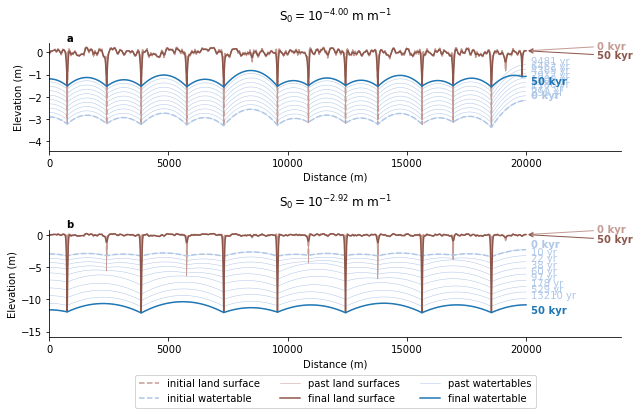

In [56]:
import importlib
importlib.reload(flib)

#changed_param = scenario_param_names[0][:-2]
    
#param_vals = df[changed_param].values
#param_label = display_param

n_plots = len(plot_inds)

fig, axs = pl.subplots(n_plots, 1, figsize=(9, n_plots * 3))

for ax, pi in zip(axs, plot_inds):
    
    if ax == axs[-1]:
        add_legend = True
    else:
        add_legend = False
        
    flib.make_h_and_z_plot(ax, times_all[pi], x, zs_all[pi], hs_all[pi], add_legend=add_legend)

    fig.tight_layout()

    
for i, ax in zip(itertools.count(), axs):
    tekst = ''
    for changed_param in changed_params:
        if log_transform_par is True:
            tekst +=  r'$%s = 10^{%0.2f}\;%s$' % (param_label, np.log10(df.iloc[plot_inds[i]][changed_param] * param_multiplier), param_unit)
        else:
            tekst +=  r'$%s = %0.2f \; %s$' % (param_label, df.iloc[plot_inds[i]][changed_param] * param_multiplier, param_unit)
            
        tekst += '\n'
    ax.set_title(tekst, ha='center')
    
for i, panel in enumerate(axs):
    #panel.spines['top'].set_visible(False)
    #panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='bottom')

#for ax in axs:
#    ax.set_xlim(10000, ax.get_xlim()[-1])
    
fig.tight_layout()

fnout = f'model_results/modelled_h_and_z_{len(plot_inds)}_model_exps_{"".join(changed_params)}.pdf' 
print(f'saving model exps as {fnout}')
fig.savefig(fnout)



In [ ]:
################################################
## Figure with n streams, fluxes and erosion over time
################################################
ncols = len(plot_inds)
fig, axs = pl.subplots(4, ncols, sharex=True, sharey='row', figsize=(8, 0.5 + ncols * 2.5))

for i, pi in enumerate(plot_inds):
    
    axsi = axs[:, i]
    
    if i == 0:
        add_labels_left = True
        add_labels_right = False
        add_legend = False
    elif i == ncols -1:
        add_legend = True
        add_labels_left = False
        add_labels_right = True
    else:
        add_legend = False
        add_labels_left = False
        add_labels_right = False
    
    width = x.max() - x.min()
    
    flib.vars_over_time_fig(axsi, times_all[pi], width, n_str_all[pi], 
                            Q_baseflows_all[pi], Q_overland_flows_all[pi], 
                            erosion_of_per_yr_all[pi], erosion_bf_per_yr_all[pi],
                            erosion_hd_per_yr_all[pi], zs_all[pi], 
                            add_legend=add_legend, add_labels_left=add_labels_left, 
                            add_labels_right=add_labels_right)

    
#fig.tight_layout()

for i, ax in enumerate(axs[0, :]):
    tekst = ''
    for changed_param in changed_params:
        tekst +=  r'$%s = 10^{%0.2f}$' % (changed_param, np.log10(df.iloc[plot_inds[i]][changed_param]))
        tekst += '\n'
    ax.set_title(tekst, ha='center')
    
    
fig.subplots_adjust(hspace=0.0)

for i, panel in enumerate(axs.ravel()):
    #panel.spines['top'].set_visible(False)
    #panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, ha='left', va='bottom')

#fn = 'model_results/overview_variables_vs_time_log_%s.pdf' % output_file_adj

#print('saving figure as %s' % fn)

#fnout = fn[:-4] + 'variables_vs_time.pdf' 
#print(f'saving model exps as {fnout}')
#fig.savefig(fnout)

fnout = fn[:-4] + f'variables_vs_time_{len(plot_inds)}_model_exps_{"".join(changed_params)}.pdf' 
print(f'saving model exps as {fnout}')
fig.savefig(fnout)